In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/books.csv')

In [3]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
import seaborn as sns       
import matplotlib.pyplot as plt

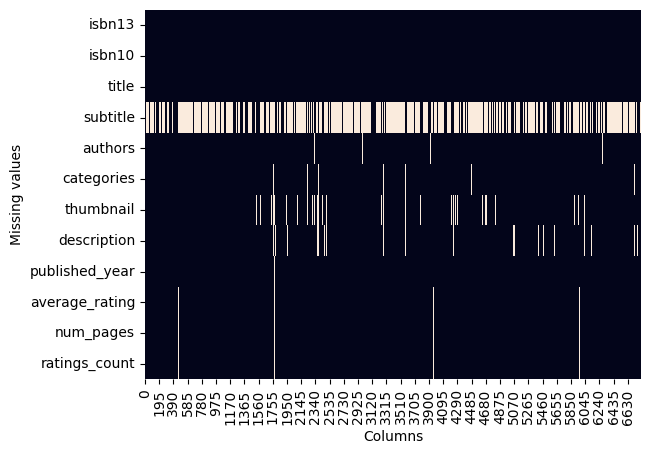

In [ ]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [7]:
import numpy as np

In [9]:
df['missing_description'] = np.where(df['description'].isna(), 1, 0)
df['age_of_book'] = 2025 - df['published_year']

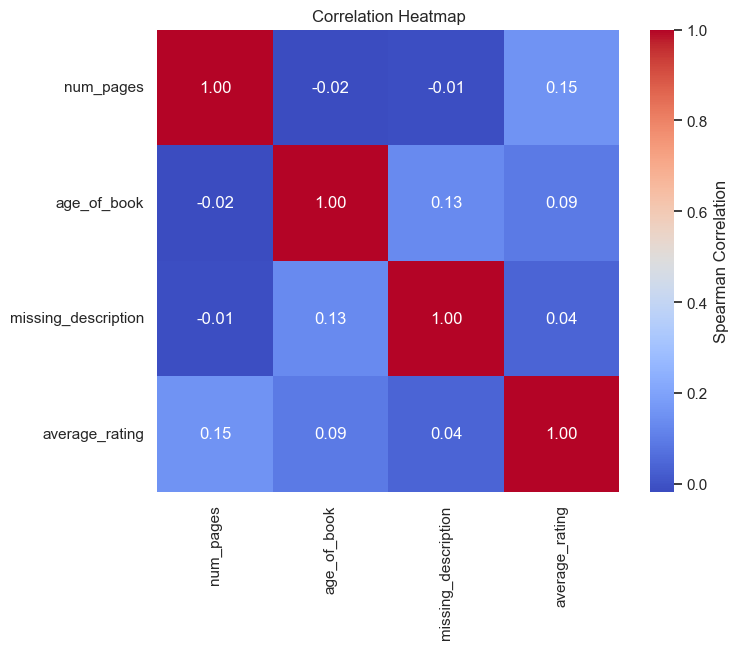

In [10]:
cols_of_interest = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

corr_matrix = df[cols_of_interest].corr(method="spearman")

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title('Correlation Heatmap')

plt.show()

In [12]:
df_complete = df[~(df['description'].isna()) &
   ~(df['num_pages'].isna()) &
   ~(df['average_rating'].isna()) &
   ~(df['published_year'].isna())
   ]

In [14]:
df_complete['categories'].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1


In [ ]:
df_complete["words_in_description"] = df_complete["description"].str.split().str.len()

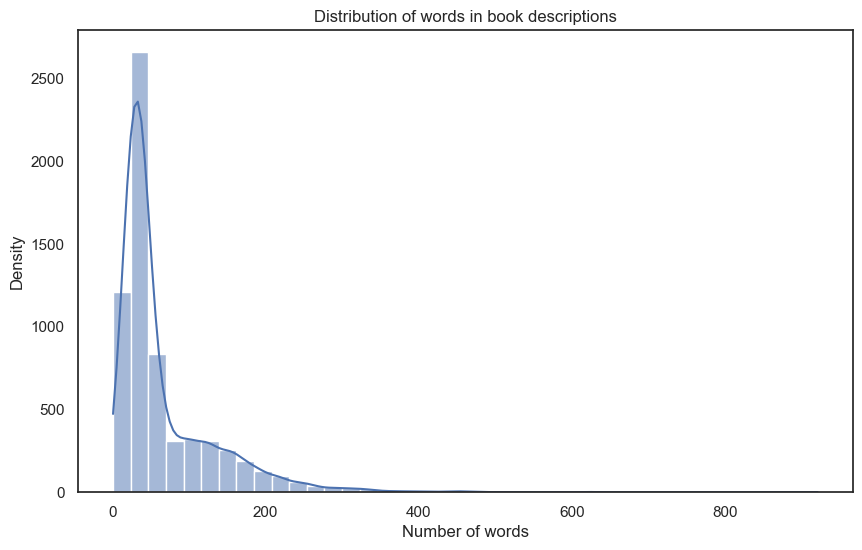

In [23]:
# Plotting the distribution of words in descriptions
plt.figure(figsize=(10, 6))
sns.histplot(df_complete["words_in_description"], bins=40, kde=True)    
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.title("Distribution of words in book descriptions")
plt.show()

In [26]:
df_complete.loc[df_complete["words_in_description"].between(1, 10), "description"]

6                                               Donation.
11                                         Fantasy-roman.
77                         Nonsense rhyming story. 4 yrs+
104                        Library of Liberal Arts title.
241     Originally published: [New York]: Clarion Book...
                              ...                        
6721                                              Horror.
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 157, dtype: object

In [27]:
df_complete_25_words = df_complete.loc[df_complete["words_in_description"] >= 25]

In [28]:
df_complete_25_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_description   5197 non-null   int64  
 13  age_of_book           5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
dtypes: float64(5), int64(3), o

In [29]:
df_complete_25_words["title_and_subtitle"] = np.where(
    df_complete_25_words["subtitle"].isna(),
    df_complete_25_words["title"],
    df_complete_25_words[["title", "subtitle"]].astype(str).agg(" - ".join, axis=1),
)

C:\Users\7608250\AppData\Local\Temp\ipykernel_9744\455839667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_25_words["title_and_subtitle"] = np.where(


In [31]:
df_complete_25_words["tagged_description"] = df_complete_25_words[["isbn13", "description"]].astype(str).agg(" - ".join, axis=1)

C:\Users\7608250\AppData\Local\Temp\ipykernel_9744\1691997556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_25_words["tagged_description"] = df_complete_25_words[["isbn13", "description"]].astype(str).agg(" - ".join, axis=1)


In [32]:
df_complete_25_words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1).to_csv("data/books_cleaned.csv", index=False)